# Project: Investigate a Dataset (TMDb movie data)
###### (cleaned from original data on [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&source=editors&ust=1624785980868000&usg=AOvVaw380SkyihkQRyHhLeV7DwYN))

### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
  
>- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Planned questions to explore over this course of the report

- Which genres are the most popular?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Setting up import statements for all of the used packages
#pip install pandas
#pip install numpy
#pip install matplotlib.pyplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis and I will document my steps carefully and justify my cleaning decisions.

### General Properties

In [2]:
# Loading data
movies_df = pd.read_csv("tmdb-movies.csv")

In [3]:
# Inspecting TMDb movie data
print("Data shape:",movies_df.shape)
movies_df.head()

Data shape: (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Inspecting TMDb movie data types and null data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [5]:
# Converting "release_year" data type from string to datetime
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])
movies_df["release_date"]

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

In [6]:
# Checking duplicated rows and removing them
movies_df.duplicated().sum()

1

In [7]:
# See what is this duplicated 
# https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
movies_df[movies_df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [8]:
# Drop duplicated rows
movies_df.drop_duplicates(inplace = True)
movies_df.duplicated().sum()

0

In [9]:
# Checking nan values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Droping nan values
movies_df.dropna(inplace=True)
movies_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question #1 (Which genres are the most popular?)

In [11]:
# Split "genres" that contain multiple values separated by pipe (|) characters and take the 1st value
movies_df["genres"] = movies_df["genres"].apply(lambda x : x.split("|")[0])
movies_df["genres"]

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10724      Adventure
10759         Horror
10760         Comedy
10817    Documentary
10819         Action
Name: genres, Length: 1992, dtype: object

In [12]:
# Group "genres" and mean "popularity"
genres_popularity = movies_df.groupby(["genres"])["popularity"].mean()
genres_popularity

genres
Action             1.986913
Adventure          2.579849
Animation          1.581842
Comedy             0.880423
Crime              1.327691
Documentary        0.268144
Drama              0.989608
Family             1.380851
Fantasy            1.754675
History            1.345724
Horror             0.754793
Music              0.423895
Mystery            1.422963
Romance            1.303659
Science Fiction    2.338259
TV Movie           0.377490
Thriller           1.024357
War                1.588715
Western            3.699665
Name: popularity, dtype: float64

In [13]:
# Reusable functions for plotting
def draw_bar(data, x_label, y_label, p_title):
    plt.subplots(figsize=(30,15))
    plt.bar(data.index, data, alpha=0.5, color="green")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(p_title)
    plt.grid(True)

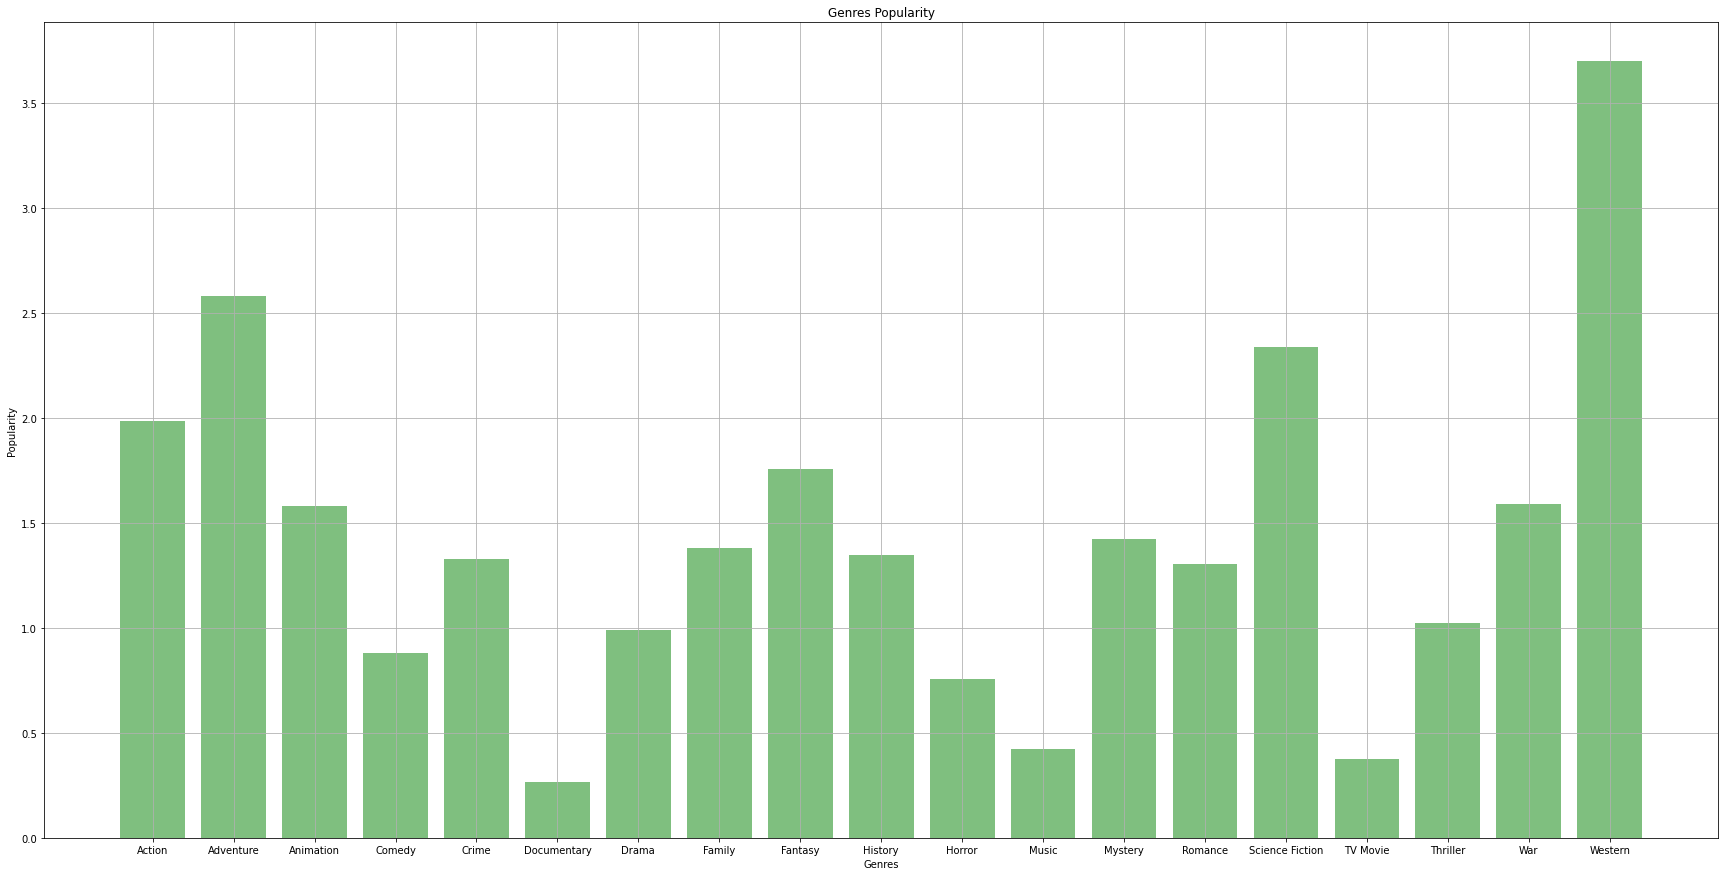

In [14]:
# Plotting genres_popularity and observe the most popular genres
draw_bar(genres_popularity,"Genres","Popularity","Genres Popularity")

> ### It seems that "Western" is the most popular genres

### Research Question #2  (What kinds of properties are associated with movies that have high revenues?)

In [15]:
# Create sorted DataFrame by column "revenue"
highest_revenue = movies_df.sort_values(by=["revenue"],ascending=False)
highest_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,46221,tt1735485,0.374156,135000,0,The Tunnel,Bel DeliÃ¡|Steve Davis|Luke Arnold|Andy Rodore...,http://www.thetunnelmovie.net,Carlo Ledesma,The light runs out,...,"In 2007, in the midst of the drought and water...",90,Horror,Distracted Media|Zapruder's Other Films|DLSHS,2011-05-19,49,5.3,2011,1.308687e+05,0.000000e+00
3655,103516,tt1500512,0.420010,0,0,Private Romeo,Hale Appleman|Charlie Barnett|Barry Adamson|Ch...,http://www.privateromeothemovie.com/,Alan Brown,Love goes toward love as schoolboys from their...,...,Romeo and Juliet has never been more provocati...,99,Drama,Wolfe Releasing,2011-06-20,11,4.3,2011,0.000000e+00,0.000000e+00
5404,38225,tt0120512,0.152550,0,0,Wild America,Jonathan Taylor Thomas|Scott Bairstow|Devon Sa...,http://wildamerica.warnerbros.com/,William Dear,Take a ride on the wild side.,...,"Three brothers - Marshall, Marty and Mark drea...",106,Family,Morgan Creek Productions,1997-07-02,12,6.2,1997,0.000000e+00,0.000000e+00
1859,38150,tt1220214,0.108905,0,0,Heartless,Jim Sturgess|Noel Clarke|Eddie Marsan|Luke Tre...,http://www.heartlessmovie.com/,Philip Ridley,The darker it gets the more you see,...,"The story follows Jamie, a troubled young man ...",114,Drama,Matador Pictures|Isle of Man Film|CrossDay Pro...,2009-11-21,36,6.1,2009,0.000000e+00,0.000000e+00


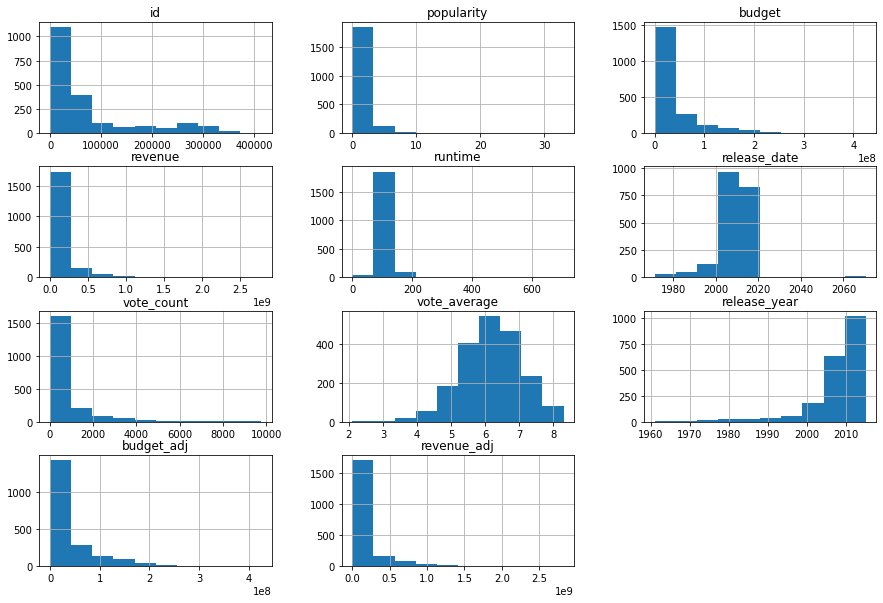

In [16]:
# Explore some relations
highest_revenue.hist(figsize=(15,10));

> ### We will choose "vote_average" and "runtime" to study them in depth 

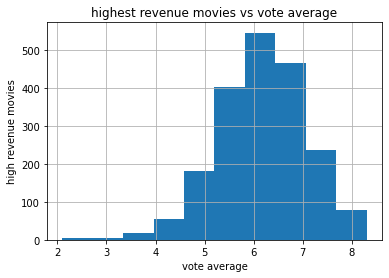

In [17]:
# Find the high revenue movies average vote average
highest_revenue.vote_average.hist();
plt.xlabel("vote average")
plt.ylabel("high revenue movies")
plt.title("highest revenue movies vs vote average")
plt.grid(True)

> ### It seems that higher revenue movies have vote average around 6.5/10

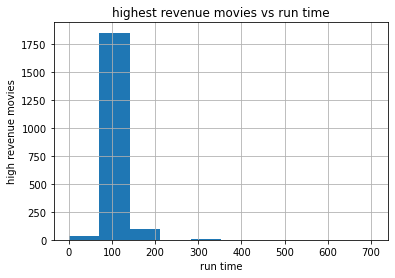

In [18]:
# Find the high revenue movies average run time
highest_revenue.runtime.hist();
plt.xlabel("run time")
plt.ylabel("high revenue movies")
plt.title("highest revenue movies vs run time")
plt.grid(True)

> ### It seems that higher revenue movies have run time around 100 min

<a id='conclusions'></a>
## Conclusions

> Which genres are the most popular? 
>> Western

<br>

> What kinds of properties are associated with movies that have high revenues?
>> - Higher revenue movies have vote average around 6.5/10
>> - Higher revenue movies have run time around 100 min

<br>

### Limitations
- Tha Data in not updated. There is no data after 2015 till now, that means our findings may change depending on the data will be added.

- There are a lot of missing data and zero values (e.g. Some movies has no budget, revenue or geners  values) which lead to inaccurate analysis if we remove them or change them with mean values which make no sense.